# Nama: Muhamad Rajwa Athoriq

# Backgroud Problem
Sumber daya manusia (SDM) adalah aset utama yang perlu dikelola dengan baik oleh perusahaan agar tujuan bisnis dapat tercapai dengan efektif dan efisien. Pada kesempatan kali ini, kita akan menghadapi sebuah permasalahan tentang sumber daya manusia yang ada di perusahaan. Fokus kita adalah untuk mengetahui bagaimana cara menjaga karyawan agar tetap bertahan di perusahaan yang ada saat ini yang dapat mengakibatkan bengkaknya biaya untuk rekrutmen karyawan serta pelatihan untuk mereka yang baru masuk. Dengan mengetahui faktor utama yang menyebabkan karyawan tidak merasa, perusahaan dapat segera menanggulanginya dengan membuat program-program yang relevan dengan permasalahan karyawan.

# Dataset
Link: https://drive.google.com/file/d/1YyZfVX2xakEH_YDei-Uoefsihg7Kr7eK/view?usp=sharing

# Importing Library

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [70]:
df = pd.read_csv("Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv")
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


# Data Understanding

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [72]:
ListofDecs = []

for i in df.columns:
  ListofDecs.append([i, df[i].dtype, df[i].isna().sum(), df[i].nunique(), df[i].unique()[:5]])

df_decs = pd.DataFrame(ListofDecs, columns=['column', 'type', 'null', 'number of unique value', 'sample unique value'])
df_decs

,column,type,null,number of unique value,sample unique value
0,Username,object,0,285,"[spiritedPorpoise3, jealousGelding2, pluckyMue..."
1,EnterpriseID,int64,0,287,"[111065, 106080, 106452, 106325, 111171]"
2,StatusPernikahan,object,0,5,"[Belum_menikah, Menikah, Bercerai, Lainnya, -]"
3,JenisKelamin,object,0,2,"[Pria, Wanita]"
4,StatusKepegawaian,object,0,3,"[Outsource, FullTime, Internship]"
5,Pekerjaan,object,0,14,"[Software Engineer (Back End), Data Analyst, S..."
6,JenjangKarir,object,0,3,"[Freshgraduate_program, Senior_level, Mid_level]"
7,PerformancePegawai,object,0,5,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
8,AsalDaerah,object,0,5,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ..."
9,HiringPlatform,object,0,9,"[Employee_Referral, Website, Indeed, LinkedIn,..."


In [73]:
df.describe(include='all')

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287.000000,287,287,287,287,287,287,287,287,287.000000,282.000000,284.000000,286.000000,281.000000,287,287,287,287,29.000000,221,287,287,287,287
unique,285,NaN,5,2,3,14,3,5,5,9,NaN,NaN,NaN,NaN,NaN,287,287,3,2,NaN,11,284,97,127,53
top,boredEggs0,NaN,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,NaN,NaN,NaN,NaN,NaN,+6287722818xxx,puzzledFish5776@hotmail.com,Sarjana,1,NaN,masih_bekerja,1987-06-14,2011-01-10,2020-1-14,-
freq,2,NaN,132,167,217,109,169,85,72,85,NaN,NaN,NaN,NaN,NaN,1,1,176,286,NaN,132,2,12,17,198
mean,NaN,105923.324042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.101045,3.904255,1.179577,0.412587,10.448399,NaN,NaN,NaN,NaN,0.517241,NaN,NaN,NaN,NaN,NaN
std,NaN,4044.977599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.836388,0.913355,2.294441,1.275016,6.902252,NaN,NaN,NaN,NaN,0.508548,NaN,NaN,NaN,NaN,NaN
min,NaN,100282.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,101269.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,106069.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,0.000000,0.000000,10.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,110514.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,0.000000,0.000000,15.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


Terdapat beberapa kolom yang mengandung missing value, yaitu:
`SkorKepuasanPegawai`, `JumlahKeIkutSertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, `JumlahKetidakhadiran`, `IkutProgramLOP`, dan `AlasanResign`. Untuk menangani missing value, dilakukan langkah-langkah sebagai berikut:

*   Kolom bertipe numerik seperti `SkorKepuasanPegawai`, `JumlahKeIkutSertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, dan `JumlahKetidakhadiran` akan diimputasi dengan nilai median.
*   Kolom bertipe kategorikal seperti `AlasanResign` akan diimputasi menggunakan nilai modus.
*   Kolom `IkutProgramLOP` akan dihapus (drop) karena dari 287 baris, sebanyak 258 baris mengandung missing value, sehingga kolom ini dianggap tidak informatif.

Selain itu, terdapat juga beberapa kolom yang dirasa kurang relevan untuk analisis dikarenakan tidak menunjukan pengaruh signifikan akan dihapus (drop), yaitu: `Username`, `EnterpriseID`, `NomorHP`, `PernahBekerja`, dan `Email`.

Langkah ini diambil untuk meningkatkan kualitas data sebelum digunakan untuk analisis lebih lanjut.

# Cleaning Data

In [74]:
df_cln = df.copy()
df_cln.drop(['Username', 'EnterpriseID', 'NomorHP', 'Email', 'IkutProgramLOP', 'PernahBekerja'], axis=1, inplace=True)

In [75]:
df_cln.sample(5)

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
118,Bercerai,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_bagus,Jakarta Barat,LinkedIn,4,5.0,0.0,0.0,15.0,Sarjana,masih_bekerja,1975-09-30,2012-10-02,2020-2-14,-
105,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Bagus,Jakarta Timur,Indeed,3,3.0,0.0,0.0,1.0,Sarjana,NaN,1970-04-24,2013-5-13,2020-1-14,-
220,Belum_menikah,Pria,Outsource,Data Engineer,Freshgraduate_program,Sangat_bagus,Jakarta Utara,LinkedIn,4,4.0,0.0,0.0,11.0,Magister,NaN,1982-07-22,2011-5-16,2016-3-30,-
199,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,3,3.0,6.0,0.0,2.0,Sarjana,NaN,1985-09-05,2012-09-05,2020-2-27,-
67,Bercerai,Pria,Outsource,Software Engineer (Back End),Mid_level,Kurang,Jakarta Barat,Employee_Referral,3,3.0,0.0,0.0,NaN,Doktor,masih_bekerja,1985-09-15,2015-3-30,2020-2-18,-


## Handle Missing Value

In [76]:
df_cln.isna().sum().rename('Number of Missing Value')

,Number of Missing Value
StatusPernikahan,0
JenisKelamin,0
StatusKepegawaian,0
Pekerjaan,0
JenjangKarir,0
PerformancePegawai,0
AsalDaerah,0
HiringPlatform,0
SkorSurveyEngagement,0
SkorKepuasanPegawai,5


In [77]:
def impute_missing_value(df):
  for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
      df[col] = df[col].fillna(df[col].median())
    else:
      df[col] = df[col].fillna(df[col].mode()[0])
  return df

In [78]:
df_cln = impute_missing_value(df_cln)
df_cln.isna().sum().rename('Number of Missing Value')

,Number of Missing Value
StatusPernikahan,0
JenisKelamin,0
StatusKepegawaian,0
Pekerjaan,0
JenjangKarir,0
PerformancePegawai,0
AsalDaerah,0
HiringPlatform,0
SkorSurveyEngagement,0
SkorKepuasanPegawai,0


## Handle Duplicate Values

In [79]:
print(f'Number of duplicate values: {df_cln.duplicated().sum()}')

Number of duplicate values: 0


## Handle Invalid Values

In [80]:
for col in df_cln.columns:
  if len(df_cln[col].unique()) < 15:
    print(f'{col}: {df_cln[col].unique()} \n')

StatusPernikahan: ['Belum_menikah' 'Menikah' 'Bercerai' 'Lainnya' '-'] 

JenisKelamin: ['Pria' 'Wanita'] 

StatusKepegawaian: ['Outsource' 'FullTime' 'Internship'] 

Pekerjaan: ['Software Engineer (Back End)' 'Data Analyst'
 'Software Engineer (Front End)' 'Product Manager'
 'Software Engineer (Android)' 'Scrum Master'
 'Product Design (UX Researcher)' 'Product Design (UI & UX)'
 'Digital Product Manager' 'Data Engineer' 'Software Engineer (iOS)'
 'DevOps Engineer' 'Software Architect' 'Machine Learning Engineer'] 

JenjangKarir: ['Freshgraduate_program' 'Senior_level' 'Mid_level'] 

PerformancePegawai: ['Sangat_bagus' 'Sangat_kurang' 'Bagus' 'Biasa' 'Kurang'] 

AsalDaerah: ['Jakarta Timur' 'Jakarta Utara' 'Jakarta Pusat' 'Jakarta Selatan'
 'Jakarta Barat'] 

HiringPlatform: ['Employee_Referral' 'Website' 'Indeed' 'LinkedIn' 'CareerBuilder'
 'Diversity_Job_Fair' 'Google_Search' 'On-line_Web_application' 'Other'] 

SkorSurveyEngagement: [4 3 2 1 5] 

SkorKepuasanPegawai: [4. 3. 5. 2. 1.

Terdapat adanya kesalahan dalam value pada kolom `StatusPernikahan` dan `AlasanResign`, dikarenakan keduanya merupakan kolom kategori maka value yang salah tersebut akan direplace dengan value terbanyak pada kolom tersebut

In [81]:
# Feature StatusPernikahan
df_cln['StatusPernikahan'].replace(
    {'-': df_cln['StatusPernikahan'].mode()[0]},
    inplace=True)

# Feature AlasanResign
df_cln['AlasanResign'].replace(
    {'Product Design (UI & UX)': df_cln['AlasanResign'].mode()[0]},
    inplace=True)

In [82]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   AsalDaerah                          287 non-null    object 
 7   HiringPlatform                      287 non-null    object 
 8   SkorSurveyEngagement                287 non-null    int64  
 9   SkorKepuasanPegawai                 287 non-null    float64
 10  JumlahKeikutsertaanProjek           287 non-null    float64
 11  JumlahKeterlambatanSebulanTerakhir  287 non-n

## Feature Engineering

In [83]:
df_cln['YearBirth'] = df_cln['TanggalLahir'].map(
    lambda x: int(x[:4]) if x != '-' else '-')
df_cln['YearHiring'] = df_cln['TanggalHiring'].map(
    lambda x: int(x[:4]) if x != '-' else '-')
df_cln['YearPenilaian'] = df_cln['TanggalPenilaianKaryawan'].map(
    lambda x: int(x[:4]) if x != '-' else '-')
df_cln['YearResign'] = df_cln['TanggalResign'].map(
    lambda x: int(x[:4]) if x != '-' else '-')
df_cln['AgeAtResign'] = df_cln.apply(
    lambda row: row['YearResign']- row['YearBirth']
    if row['YearResign'] != '-' else 0, axis=1)
df_cln['LengthWorked'] = df_cln.apply(
    lambda row: row['YearResign'] - row['YearHiring']
    if row['YearResign'] != '-' else 0, axis=1).astype(int)
df_cln['LengthWorked'] = df_cln['LengthWorked'].map(
    lambda x: 0 if x < 0 else x)
df_cln['Resign'] = df_cln['AlasanResign'].apply(
    lambda x: 'Stay' if x =='masih_bekerja' else 'Resign')

# # Drop columns
df_cln.drop(['TanggalLahir', 'TanggalHiring',
             'TanggalPenilaianKaryawan', 'TanggalResign'],
             axis=1, inplace=True)

In [84]:
pd.set_option('display.max_columns', None)
df_cln

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,YearBirth,YearHiring,YearPenilaian,YearResign,AgeAtResign,LengthWorked,Resign
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,masih_bekerja,1972,2011,2016,-,0,0,Stay
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,toxic_culture,1984,2014,2020,2018,34,4,Resign
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,jam_kerja,1974,2011,2016,2014,40,3,Resign
3,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,masih_bekerja,1979,2014,2020,-,0,0,Stay
4,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,ganti_karir,1974,2013,2020,2018,44,5,Resign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,2,5.0,0.0,0.0,16.0,Sarjana,masih_bekerja,1973,2011,2016,-,0,0,Stay
283,Belum_menikah,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,4,5.0,0.0,0.0,11.0,Sarjana,jam_kerja,1974,2013,2020,2017,43,4,Resign
284,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,2,5.0,0.0,0.0,17.0,Sarjana,ganti_karir,1969,2013,2020,2018,49,5,Resign
285,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,4,5.0,0.0,0.0,20.0,Sarjana,kejelasan_karir,1981,2011,2014,2018,37,7,Resign


# Exploratory Data Analysis

In [85]:
df_eda = df_cln.copy()
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   AsalDaerah                          287 non-null    object 
 7   HiringPlatform                      287 non-null    object 
 8   SkorSurveyEngagement                287 non-null    int64  
 9   SkorKepuasanPegawai                 287 non-null    float64
 10  JumlahKeikutsertaanProjek           287 non-null    float64
 11  JumlahKeterlambatanSebulanTerakhir  287 non-n

In [86]:
cats = df_eda.select_dtypes(include='object').columns
nums = df_eda.select_dtypes(include='number').columns
print(f'Jumlah kolom kategorikal: {len(cats)}')
print(f'Jumlah kolom numerik: {len(nums)}')

Jumlah kolom kategorikal: 12
Jumlah kolom numerik: 10


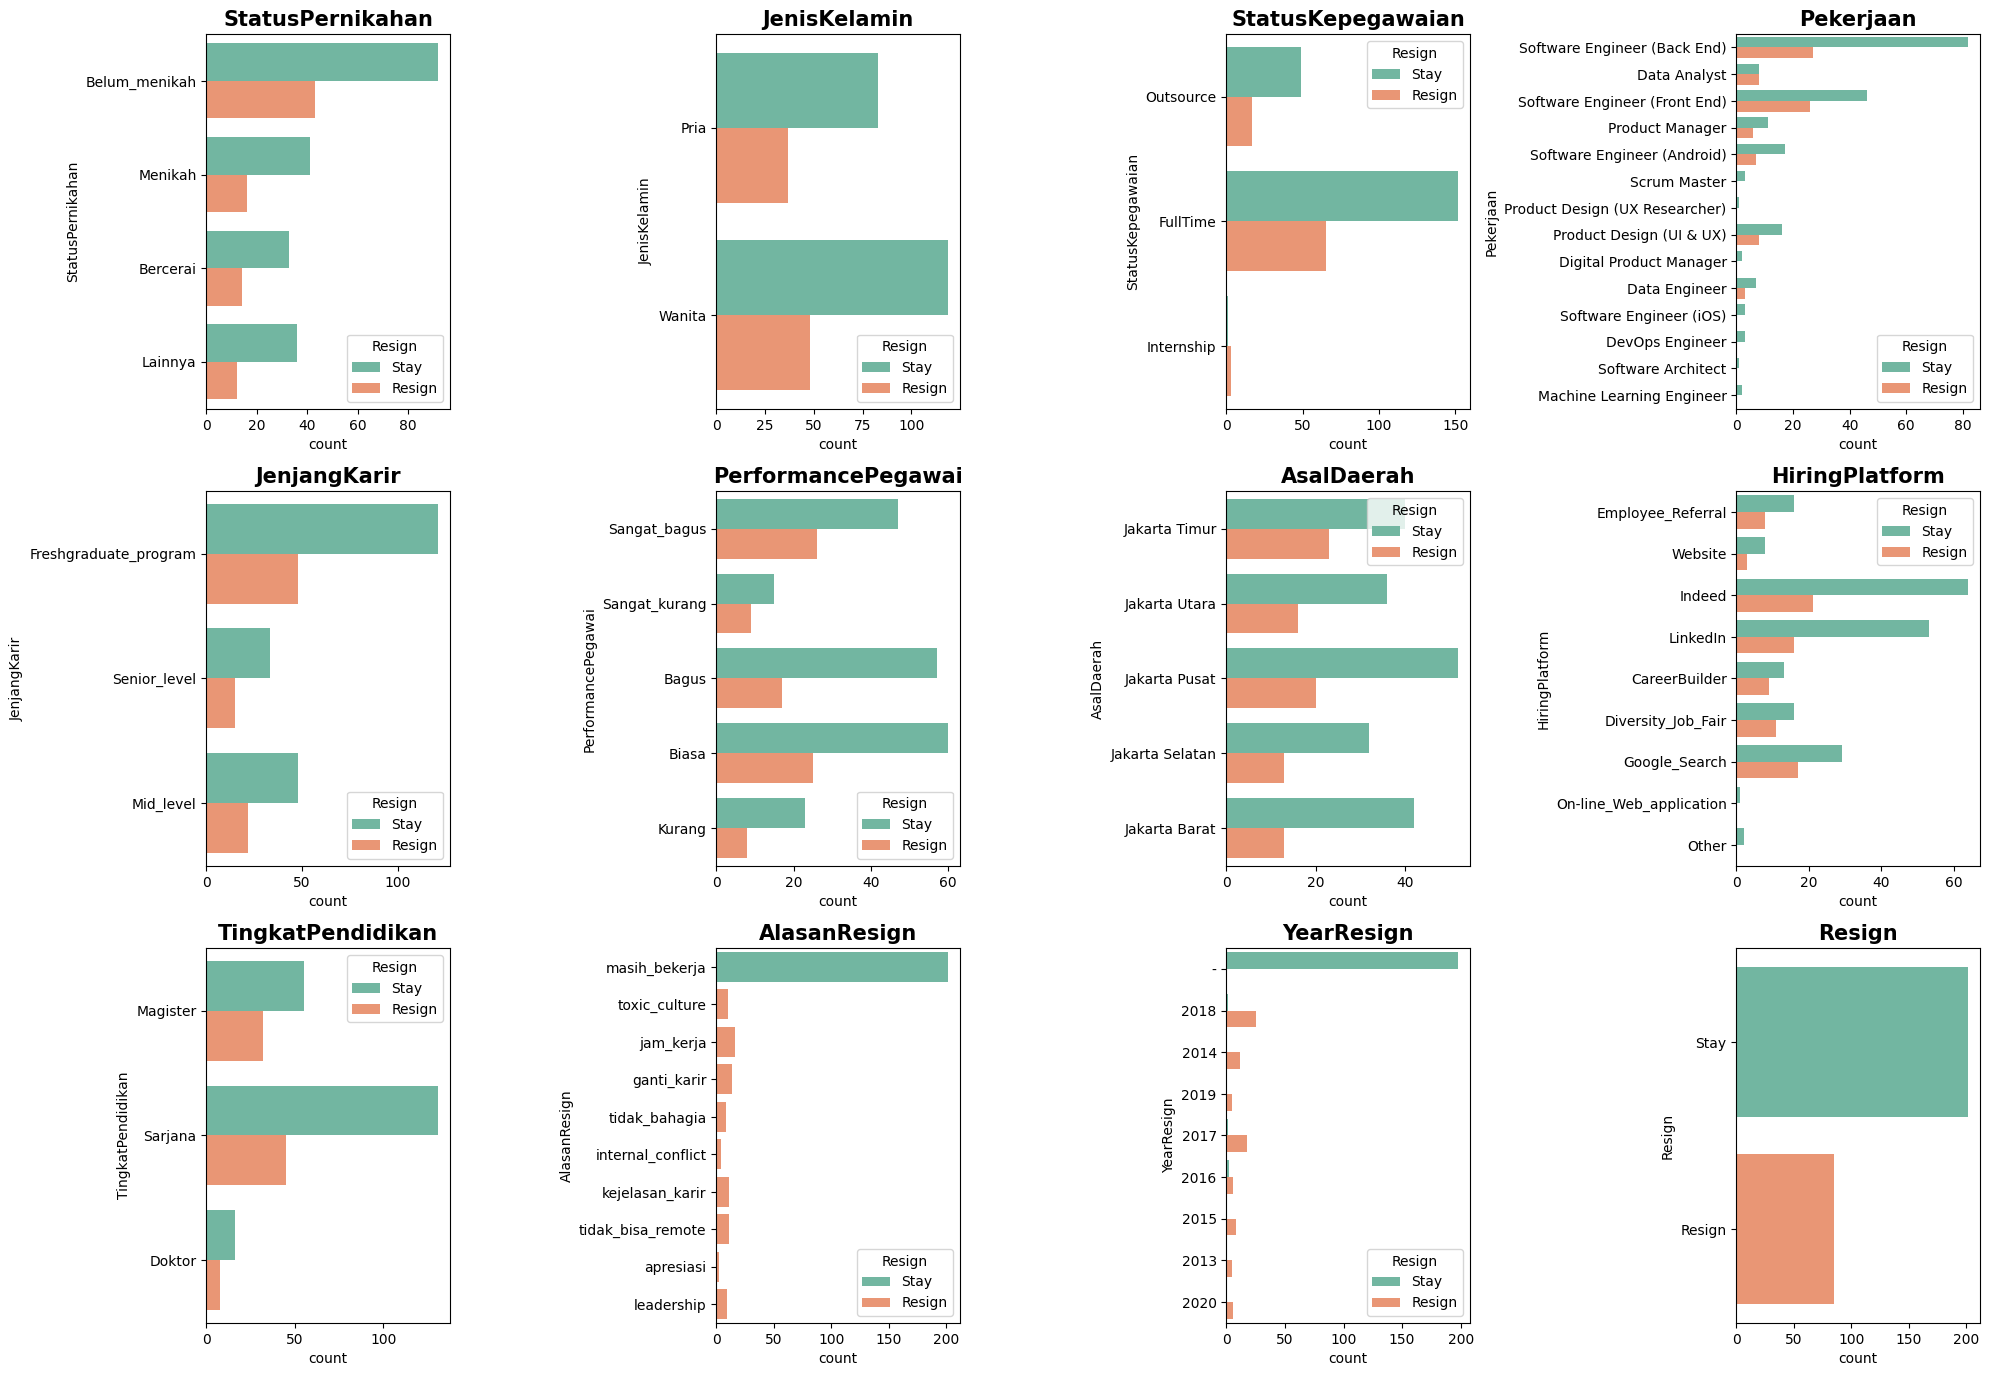

In [87]:
plt.figure(figsize=(20, 18))

for i, col in enumerate(cats):
  plt.subplot(4, 4, i+1)
  sns.countplot(data=df_eda, y=col, hue='Resign', palette='Set2')
  plt.title(col, fontsize=15, weight='bold')

plt.tight_layout()
plt.show()

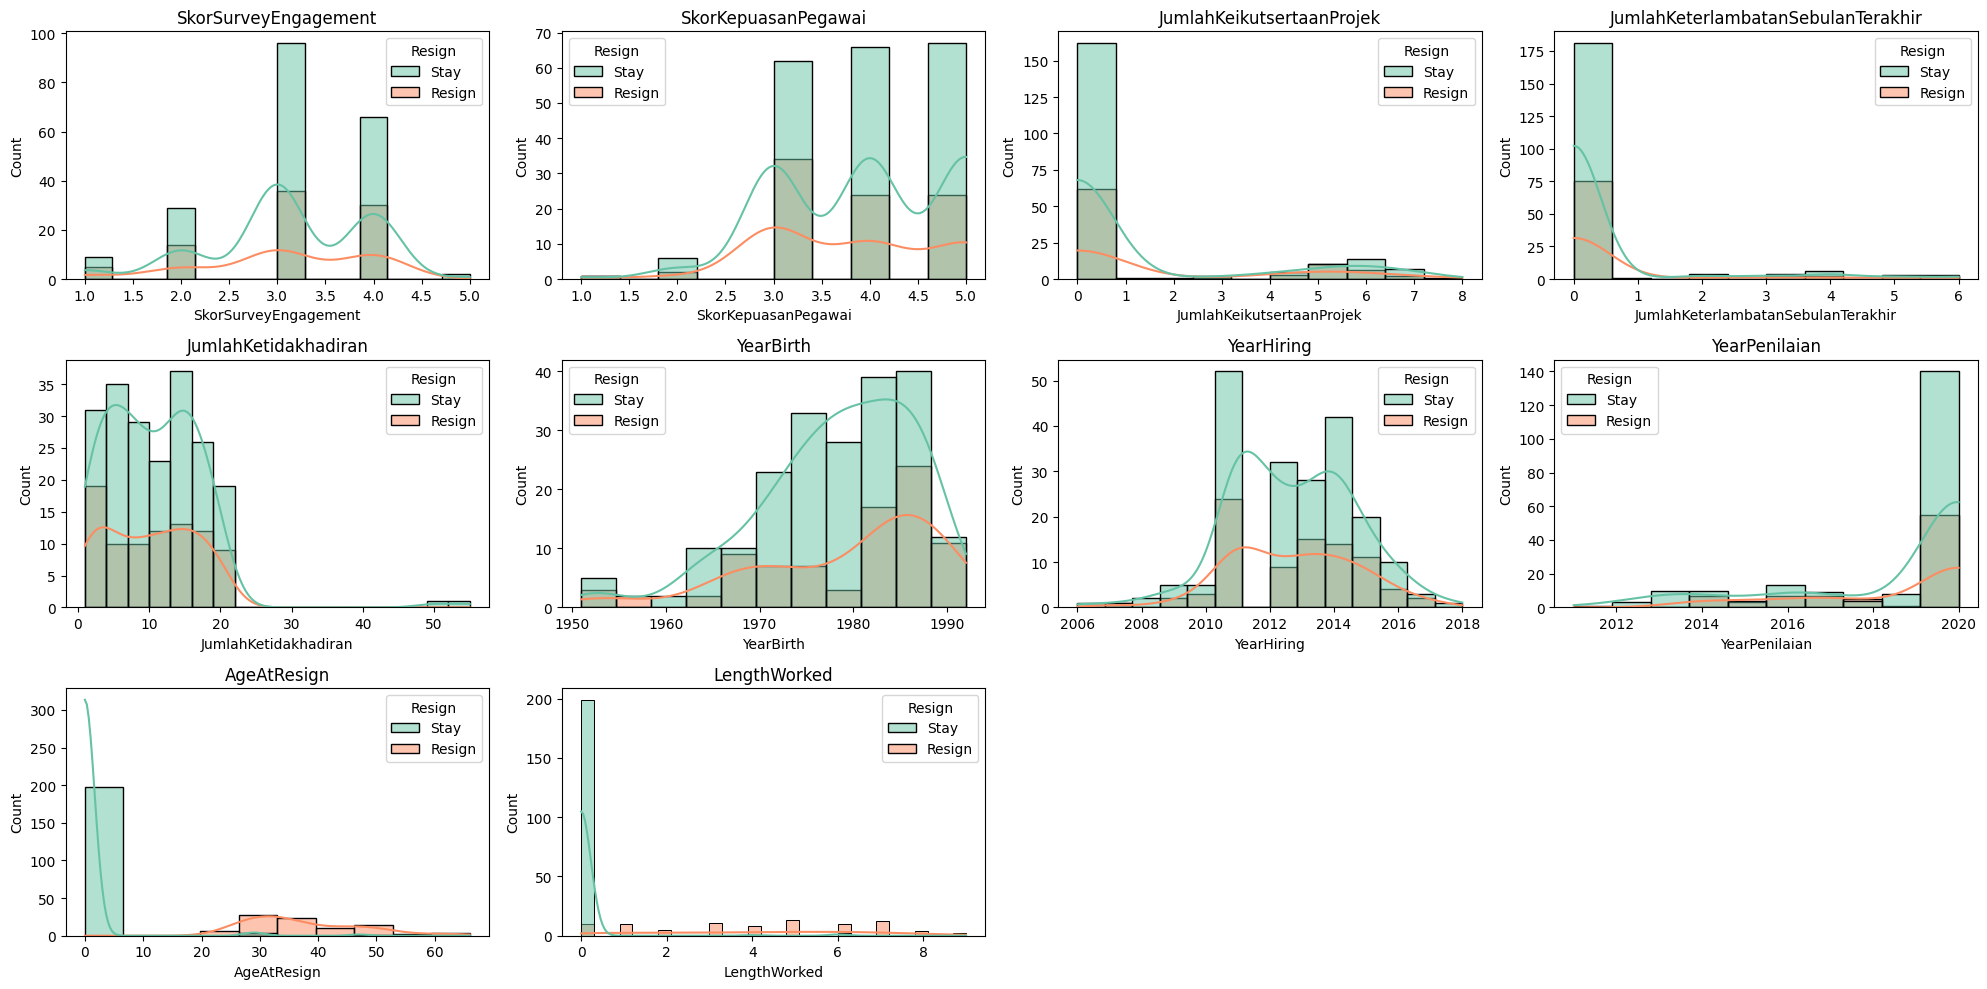

In [88]:
plt.figure(figsize=(20, 10))

for i, col in enumerate(nums):
  plt.subplot(3, 4, i+1)
  sns.histplot(data=df_eda, x=col, kde=True, hue='Resign', palette='Set2')
  plt.title(col)

plt.tight_layout()
plt.show()

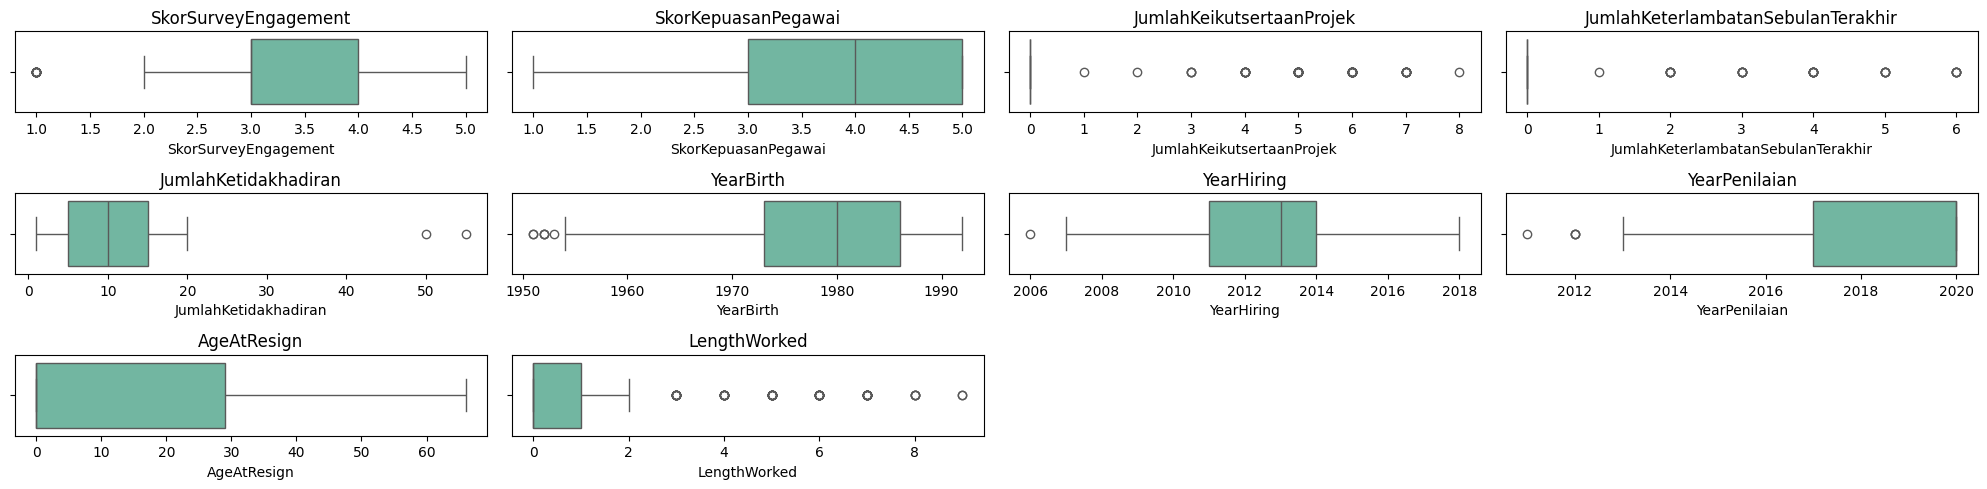

In [89]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(nums):
  plt.subplot(3, 4, i+1)
  sns.boxplot(data=df_eda, x=col, palette='Set2')
  plt.title(col)

plt.tight_layout()
plt.show()

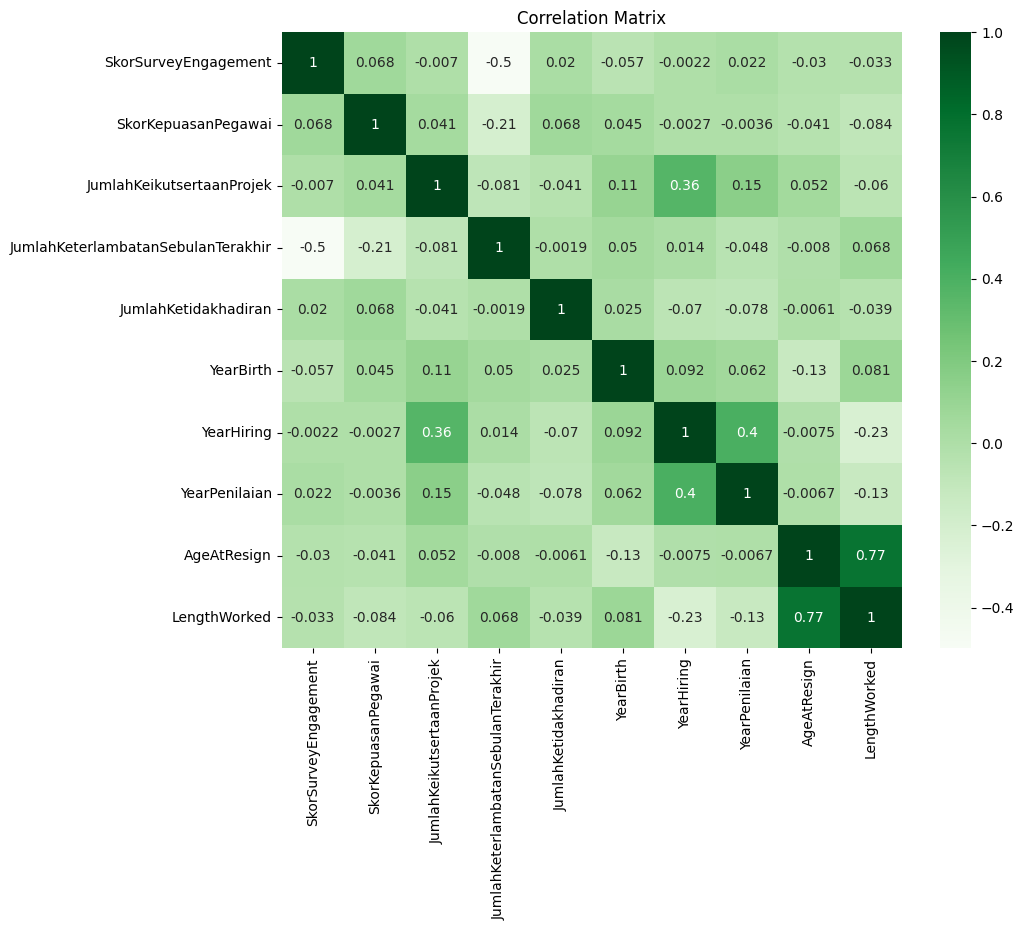

In [90]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_eda[nums].corr(), annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

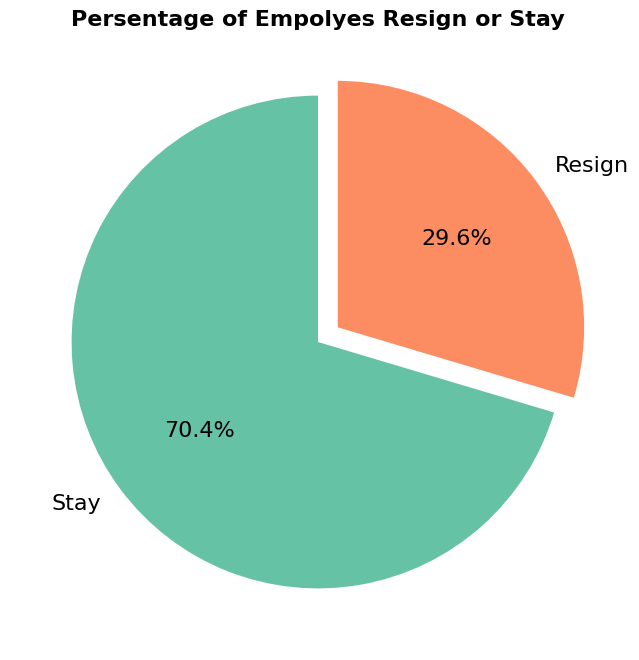

In [91]:
plt.figure(figsize=(10,8))

plt.pie(df_eda['Resign'].value_counts(), labels=df_eda['Resign'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'), explode=(0, 0.1), textprops={'fontsize': 16})
plt.title('Persentage of Empolyes Resign or Stay', fontsize=16, weight='bold')
plt.show()

In [92]:
hiring = df_eda[df_eda['Resign'] != 'Resign'].groupby('YearHiring').size().reset_index(name='hiring_count')
resign = df_eda[df_eda['Resign'] == 'Resign'].groupby('YearResign').size().reset_index(name='resign_count')

hiring = hiring.rename(columns={'YearHiring': 'Year'})
resign = resign.rename(columns={'YearResign': 'Year'})

num_employing = pd.merge(hiring, resign, how='outer', on='Year')
num_employing.fillna(0, inplace=True)
num_employing['TotalKaryawanMasuk'] = num_employing['hiring_count'].cumsum()
num_employing['TotalKaryawanKeluar'] = num_employing['resign_count'].cumsum()
num_employing['TotalKaryawanBertahan'] = num_employing['TotalKaryawanMasuk'] - num_employing['TotalKaryawanKeluar']
num_employing['Perubahan'] = num_employing['TotalKaryawanBertahan'].diff().fillna(num_employing['TotalKaryawanBertahan'])
num_employing

,Year,hiring_count,resign_count,TotalKaryawanMasuk,TotalKaryawanKeluar,TotalKaryawanBertahan,Perubahan
0,2006,1.0,0.0,1.0,0.0,1.0,1.0
1,2007,1.0,0.0,2.0,0.0,2.0,1.0
2,2008,2.0,0.0,4.0,0.0,4.0,2.0
3,2009,5.0,0.0,9.0,0.0,9.0,5.0
4,2010,5.0,0.0,14.0,0.0,14.0,5.0
5,2011,52.0,0.0,66.0,0.0,66.0,52.0
6,2012,32.0,0.0,98.0,0.0,98.0,32.0
7,2013,28.0,5.0,126.0,5.0,121.0,23.0
8,2014,42.0,12.0,168.0,17.0,151.0,30.0
9,2015,20.0,8.0,188.0,25.0,163.0,12.0


In [93]:
# Create waterfall chart
fig = go.Figure(go.Waterfall(
    name = "Karyawan",
    orientation = "v",
    measure = ["relative"] * len(num_employing),
    x = num_employing['Year'],
    textposition = "auto",
    y = num_employing['Perubahan'],
    text=num_employing['Perubahan'].astype(int).tolist(),
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
    title = "Number of Hiring and Resigning Employees",
    xaxis_title = "Year",
    yaxis_title = "Number of Employees",
    showlegend = True
)

fig.show()

Berdasarkan grafik, perusahaan menunjukkan pertumbuhan yang sehat dan signifikan dari tahun 2006 hingga 2014, dengan peningkatan jumlah karyawan yang bertahan setiap tahun, terutama lonjakan besar pada 2011. Namun, mulai 2015, laju pertumbuhan melambat, dan pada 2017-2018 terjadi penurunan jumlah karyawan yang signifikan (-15 pada 2017 dan -24 pada 2018), yang dapat mengindikasikan tantangan serius seperti tingkat turnover tinggi, restrukturisasi, atau masalah operasional. Tren penurunan berlanjut pada 2019-2020, meskipun dalam jumlah yang lebih kecil (-5 dan -6), menunjukkan adanya tanda-tanda mengkhawatirkan yang perlu ditangani segera. Maka dari itu untuk menganalisis penyebab turnover, meningkatkan strategi retensi karyawan, dan memantau tren ini sangat diperlukan untuk menghindari dampak negatif jangka panjang.

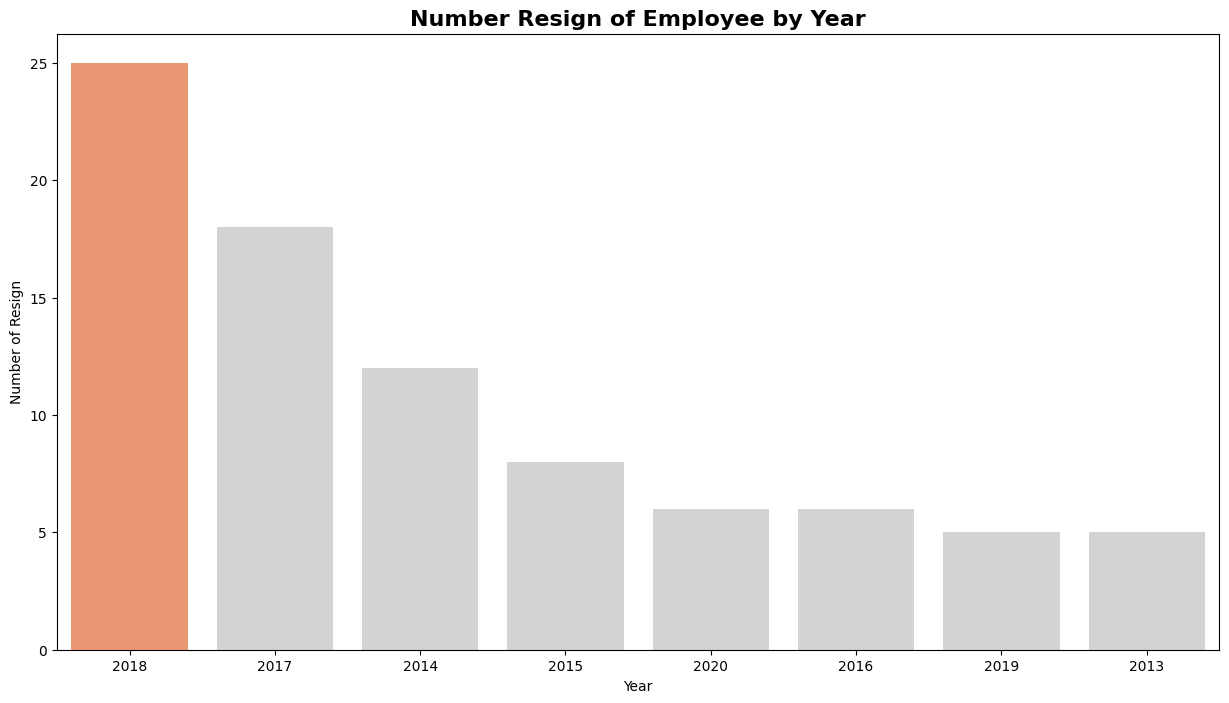

In [94]:
year_df = df_eda[df_eda['Resign'] == 'Resign']

plt.figure(figsize=(15, 8))
sns.countplot(data=year_df, x='YearResign', order=year_df['YearResign'].value_counts().index, palette=['#fc8d62', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey'])
plt.title('Number Resign of Employee by Year', fontsize=16, weight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Resign')
plt.show()

Text(0.5, 0, 'Age')

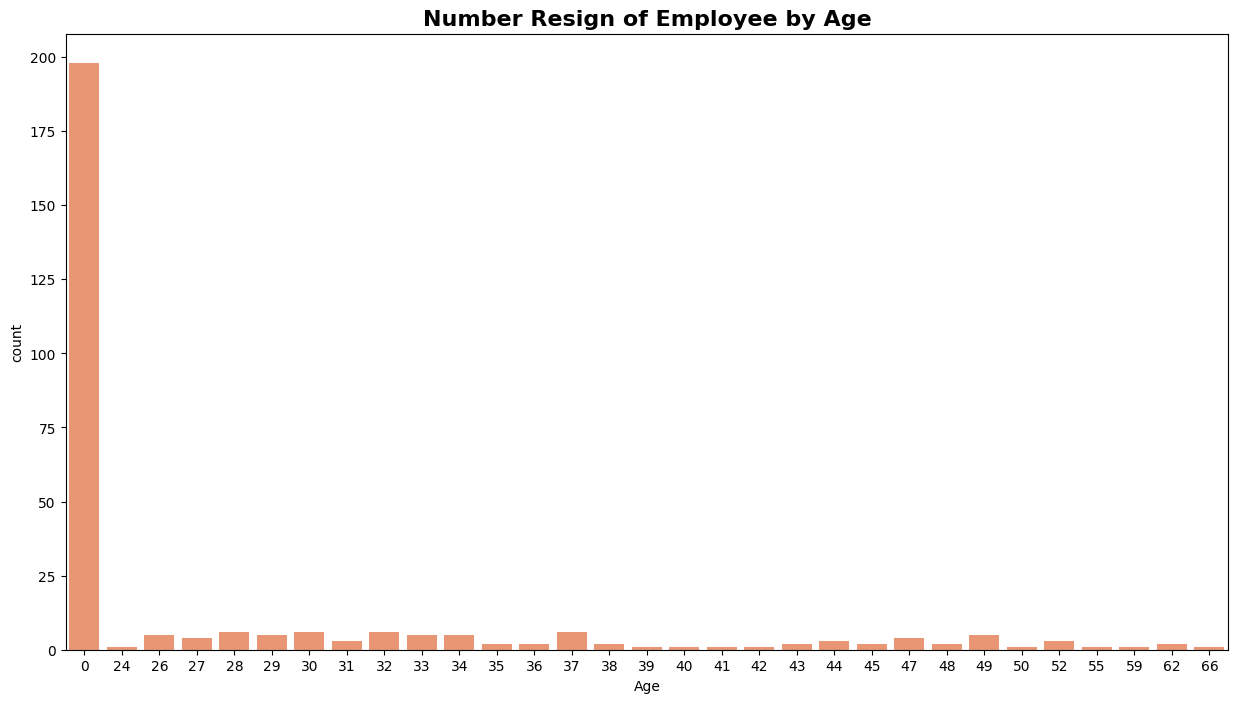

In [95]:
year_resign = df_eda[df_eda['AgeAtResign'] != '-'].groupby('AgeAtResign').size().reset_index(name='count')

plt.figure(figsize=(15, 8))
sns.barplot(data=year_resign, x='AgeAtResign', y='count', color='#fc8d62')
plt.title('Number Resign of Employee by Age', fontsize=16, weight='bold')
plt.xlabel('Age')

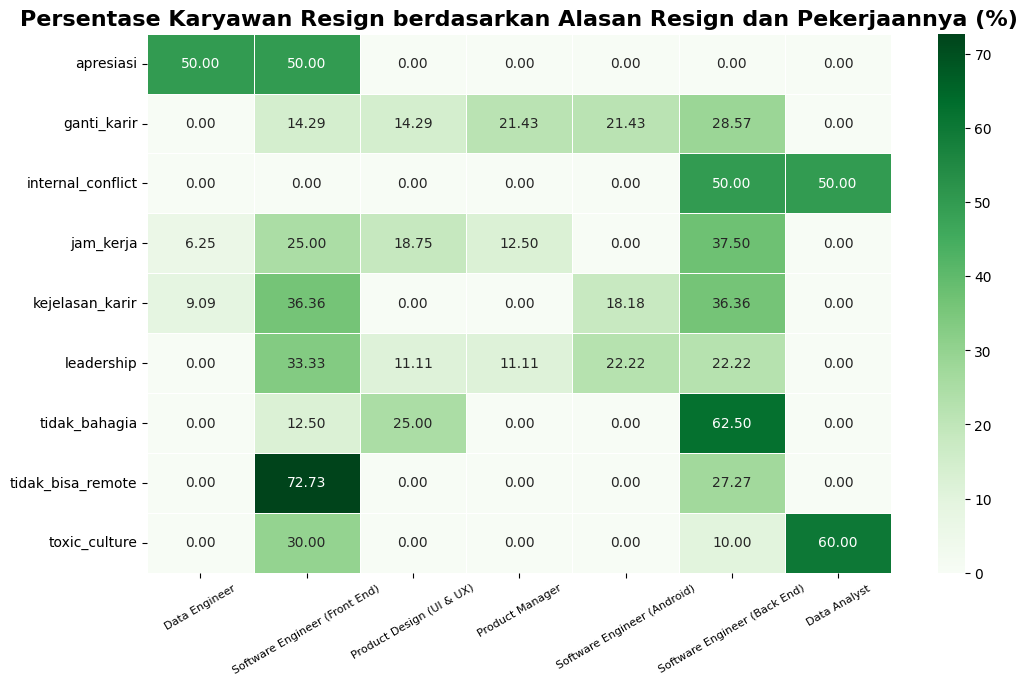

In [96]:
reason = df_eda[df_eda['Resign'] == 'Resign'].groupby(['AlasanResign', 'Pekerjaan']).size().reset_index(name='count')

review_matrix = []
performance_sort = reason["Pekerjaan"].unique()
for x in reason["AlasanResign"].unique():
    temp_df = reason[reason["AlasanResign"]==x].set_index("Pekerjaan")["count"].reindex(performance_sort).fillna(0)
    temp_vector = [int(x) for x in temp_df.reset_index()["count"]]
    review_matrix.append(temp_vector)

review_result = pd.DataFrame(review_matrix, index=reason["AlasanResign"].unique(), columns=performance_sort)
division_list = np.sum(review_matrix, axis=1).tolist()
for index,value in enumerate(review_result.index):
    review_result.loc[value] = round(100.00*review_result.loc[value]/division_list[index],2)

plt.figure(figsize=(12,7))
ax = sns.heatmap(review_result, linewidths=.5, annot=True, fmt=',.02f', cmap="Greens", cbar=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, fontsize = 8)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title("Persentase Karyawan Resign berdasarkan Alasan Resign dan Pekerjaannya (%)", fontsize=16, weight='bold')
plt.show()

Kesimpulan dari grafik pengunduran diri karyawan perusahaan dari tahun 2013 hingga 2020 adalah sebagai berikut:

Pada awal periode, faktor utama yang menyebabkan pengunduran diri karyawan adalah aspek kepemimpinan dan perubahan karir. Namun, seiring berjalannya waktu, muncul faktor-faktor baru yang semakin dominan, seperti budaya kerja yang tidak sehat (toxic culture) dan kesulitan bekerja secara remote (tdak_bisa_remote). Tren ini menunjukkan adanya perubahan dinamika dan tantangan yang dihadapi perusahaan dalam mempertahankan talenta terbaiknya. Perusahaan perlu menganalisis dan mengatasi isu-isu ini secara komprehensif, misalnya dengan memperbaiki kualitas kepemimpinan, menciptakan budaya kerja yang lebih positif, serta menyediakan dukungan yang lebih baik bagi karyawan dalam bekerja secara remote. Upaya-upaya ini diharapkan dapat membantu perusahaan menekan tingkat turnover dan memastikan pertumbuhan yang berkelanjutan.

In [97]:
div = df_eda[df_eda['Resign'] == 'Resign'].groupby(['Pekerjaan', 'YearResign']).size().reset_index().rename(columns={0: 'Jumlah Karyawan'})
div['YearResign'] = div['YearResign'].astype(int)
div = div.pivot_table(index='YearResign', columns='Pekerjaan', values='Jumlah Karyawan')
div.fillna(0, inplace=True)
div

Pekerjaan,Data Analyst,Data Engineer,Product Design (UI & UX),Product Manager,Software Engineer (Android),Software Engineer (Back End),Software Engineer (Front End)
YearResign,,,,,,,
2013,0.0,0.0,1.0,0.0,1.0,1.0,2.0
2014,2.0,0.0,0.0,0.0,3.0,3.0,4.0
2015,1.0,1.0,0.0,0.0,1.0,5.0,0.0
2016,0.0,0.0,1.0,1.0,1.0,1.0,2.0
2017,3.0,2.0,2.0,0.0,0.0,5.0,6.0
2018,2.0,0.0,3.0,5.0,1.0,9.0,5.0
2019,0.0,0.0,1.0,0.0,0.0,2.0,2.0
2020,0.0,0.0,0.0,0.0,0.0,1.0,5.0


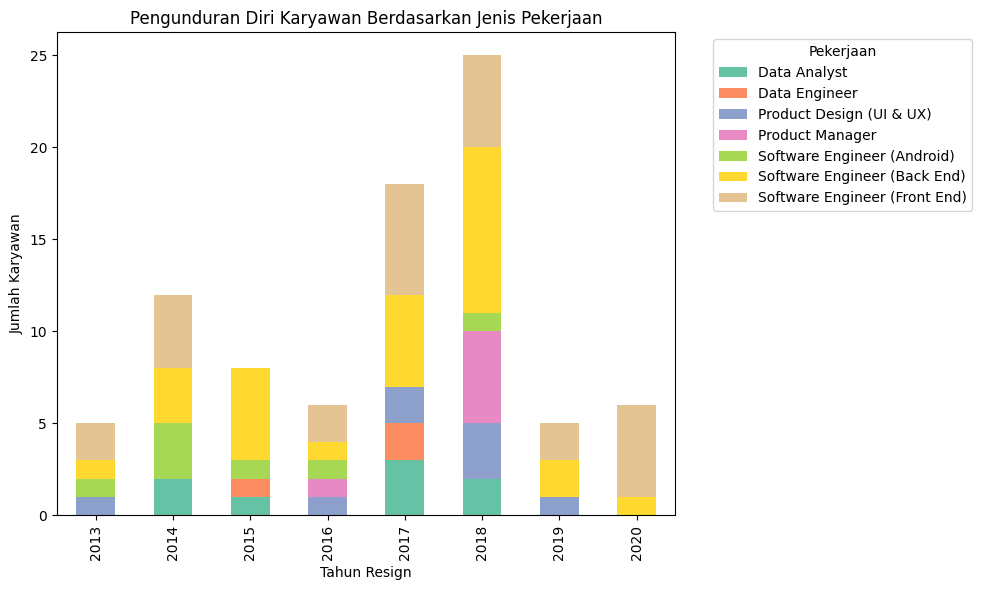

In [98]:
ax = div.plot(kind='bar', stacked=True, color=sns.color_palette("Set2"), figsize=(10, 6))

plt.xlabel('Tahun Resign')
plt.ylabel('Jumlah Karyawan')
plt.title('Pengunduran Diri Karyawan Berdasarkan Jenis Pekerjaan')
plt.legend(title='Pekerjaan', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [99]:
stay_df = df_eda[df_eda['Resign'] == 'Stay']
stay = stay_df.groupby('Pekerjaan').size().reset_index(name='count')
stay

,Pekerjaan,count
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),16
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


In [100]:
not_stay_df = df_eda[df_eda['Resign'] == 'Resign']
not_stay = not_stay_df.groupby('Pekerjaan').size().reset_index(name='count')
not_stay

,Pekerjaan,count
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),8
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),27
6,Software Engineer (Front End),26


In [101]:
stay_notStay = pd.merge(stay, not_stay, how='outer', on='Pekerjaan').rename(columns={'count_x': 'stay', 'count_y': 'not_stay'})
stay_notStay.fillna(0, inplace=True)
stay_notStay['not_stay'] = stay_notStay['not_stay'].astype(int)
stay_notStay['stay'] = stay_notStay['stay'].astype(int)
stay_notStay['total'] = stay_notStay['stay'] + stay_notStay['not_stay']
stay_notStay['persentase_stay'] = round((stay_notStay['stay'] / stay_notStay['total']) * 100, 0)
stay_notStay['persentase_not_stay'] = round((stay_notStay['not_stay'] / stay_notStay['total']) * 100,0)
stay_notStay = stay_notStay.sort_values(by='persentase_stay', ascending=False).reset_index()
stay_notStay

,index,Pekerjaan,stay,not_stay,total,persentase_stay,persentase_not_stay
0,3,Digital Product Manager,2,0,2,100.0,0.0
1,2,DevOps Engineer,3,0,3,100.0,0.0
2,4,Machine Learning Engineer,2,0,2,100.0,0.0
3,9,Software Architect,1,0,1,100.0,0.0
4,8,Scrum Master,3,0,3,100.0,0.0
5,6,Product Design (UX Researcher),1,0,1,100.0,0.0
6,13,Software Engineer (iOS),3,0,3,100.0,0.0
7,11,Software Engineer (Back End),82,27,109,75.0,25.0
8,10,Software Engineer (Android),17,7,24,71.0,29.0
9,1,Data Engineer,7,3,10,70.0,30.0


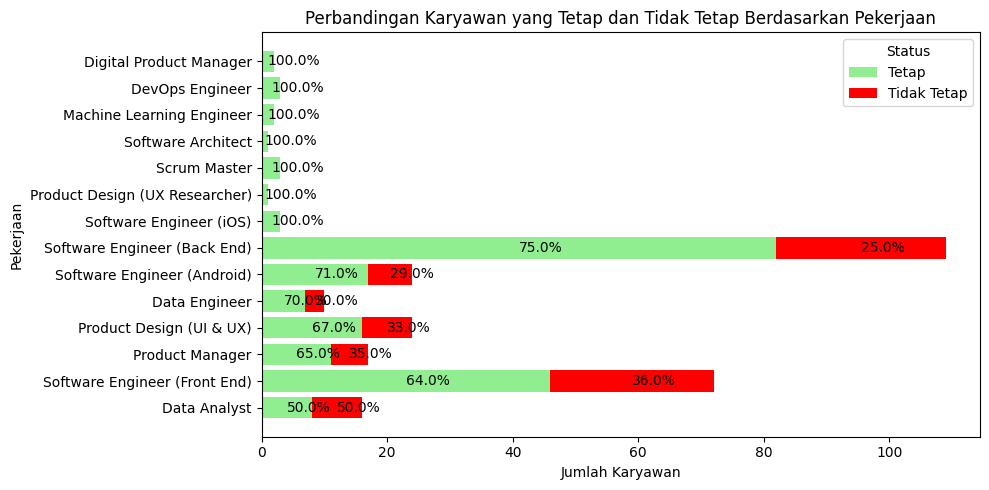

In [102]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot 'stay' bars
ax.barh(stay_notStay['Pekerjaan'], stay_notStay['stay'], color='lightgreen', label='Tetap')
# Plot 'not_stay' bars, stacking them on top of 'stay' bars
ax.barh(stay_notStay['Pekerjaan'], stay_notStay['not_stay'], left=stay_notStay['stay'], color='red', label='Tidak Tetap')

# Menambahkan persentase pada setiap batang
for i, row in stay_notStay.iterrows():
    ax.text(row['stay'] / 2, i, f'{row["persentase_stay"]:.1f}%', va='center', color='black')
    if row['persentase_not_stay'] > 0:
        ax.text(row['stay'] + row['not_stay'] / 2, i, f'{row["persentase_not_stay"]:.1f}%', va='center', color='black')

# Label dan penyesuaian tampilan
ax.set_ylabel('Pekerjaan')
ax.set_xlabel('Jumlah Karyawan')
ax.set_title('Perbandingan Karyawan yang Tetap dan Tidak Tetap Berdasarkan Pekerjaan')
ax.legend(title='Status')
ax.invert_yaxis()
plt.tight_layout()

# Menampilkan plot
plt.show()

In [103]:
pd.set_option('display.max_columns', None)
df_eda.head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,YearBirth,YearHiring,YearPenilaian,YearResign,AgeAtResign,LengthWorked,Resign
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,masih_bekerja,1972,2011,2016,-,0,0,Stay
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,toxic_culture,1984,2014,2020,2018,34,4,Resign
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,jam_kerja,1974,2011,2016,2014,40,3,Resign
3,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,masih_bekerja,1979,2014,2020,-,0,0,Stay
4,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,ganti_karir,1974,2013,2020,2018,44,5,Resign


In [104]:
jk_resign = df_eda[df_eda['Resign'] == 'Resign'].groupby(['Pekerjaan', 'JenjangKarir']).size().reset_index(name='count')
jk_resign

,Pekerjaan,JenjangKarir,count
0,Data Analyst,Freshgraduate_program,8
1,Data Engineer,Freshgraduate_program,2
2,Data Engineer,Mid_level,1
3,Product Design (UI & UX),Freshgraduate_program,6
4,Product Design (UI & UX),Mid_level,1
5,Product Design (UI & UX),Senior_level,1
6,Product Manager,Freshgraduate_program,4
7,Product Manager,Mid_level,2
8,Software Engineer (Android),Freshgraduate_program,3
9,Software Engineer (Android),Mid_level,3


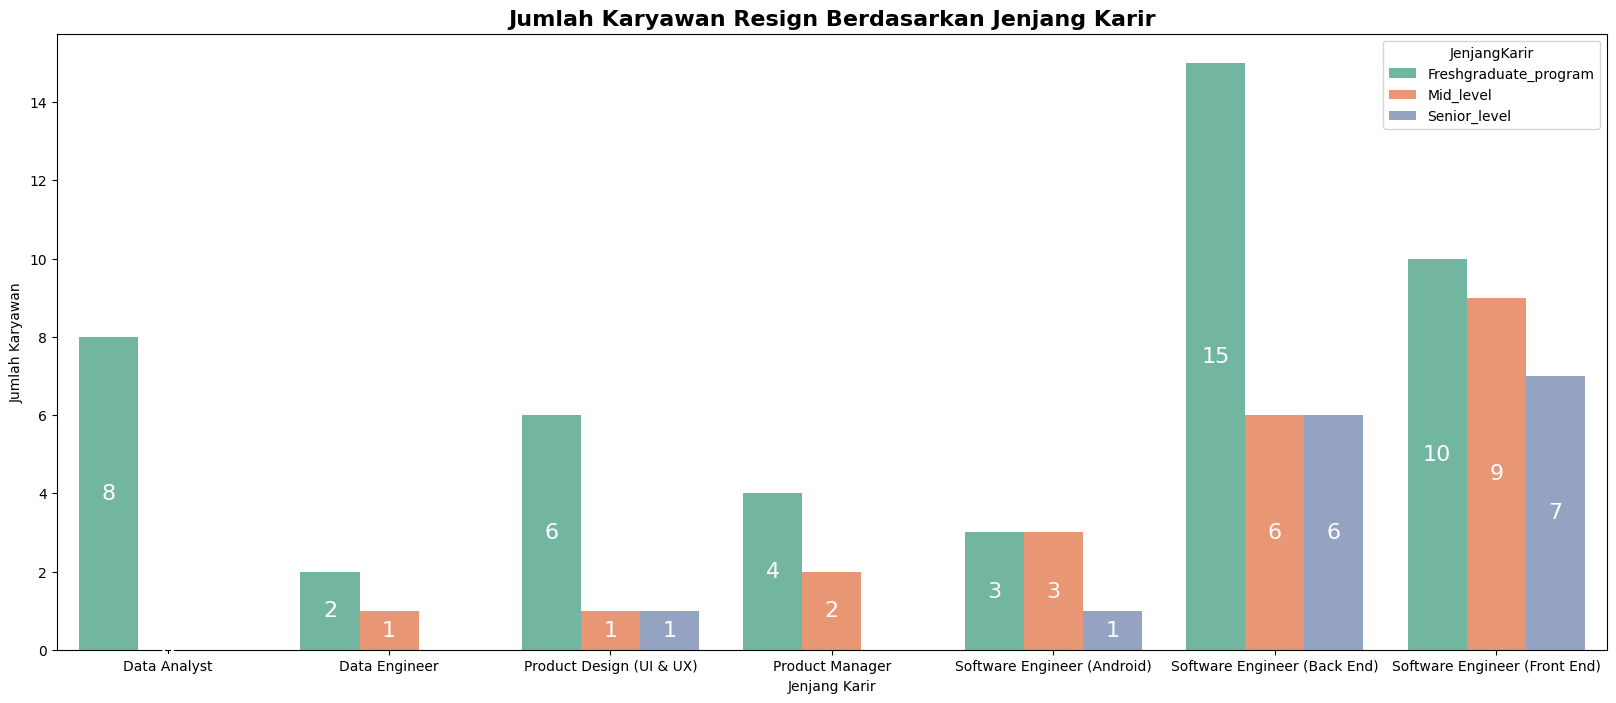

In [105]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=jk_resign, x='Pekerjaan', y='count', hue='JenjangKarir', palette='Set2')
for i in ax.patches:
    height = i.get_height()
    if not np.isnan(height):
        ax.annotate(f'{int(height)}', (i.get_x() + i.get_width()/2, height/2), va='center', ha='center', fontsize=16, color='white')

plt.title('Jumlah Karyawan Resign Berdasarkan Jenjang Karir', fontsize=16, weight='bold')
plt.xlabel('Jenjang Karir')
plt.ylabel('Jumlah Karyawan')
plt.show()

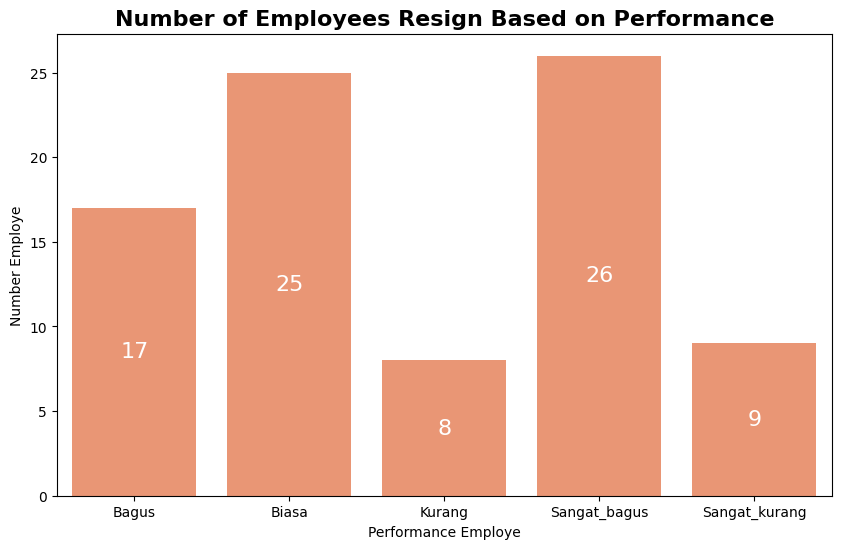

In [106]:
perform = df_eda[df_eda['Resign'] == 'Resign'].groupby(['PerformancePegawai']).size().reset_index().rename(columns={0: 'count'})
perform

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=perform, x='PerformancePegawai', y='count', color='#fc8d62')
for i in ax.patches:
  ax.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width()/2, i.get_height()/2), va='center', ha='center', fontsize=16, color='white')

plt.title('Number of Employees Resign Based on Performance', fontsize=16, weight='bold')
plt.xlabel('Performance Employe')
plt.ylabel('Number Employe')
plt.show()

# Data Preprocessing

In [107]:
df_prep = df_eda.copy()
df_prep = df_prep[['StatusPernikahan',	'JenisKelamin',	'StatusKepegawaian', 'Pekerjaan',	'JenjangKarir',	'PerformancePegawai',	'SkorSurveyEngagement',	'SkorKepuasanPegawai',	'JumlahKeikutsertaanProjek',	'JumlahKeterlambatanSebulanTerakhir',	'TingkatPendidikan', 'LengthWorked', 'AgeAtResign','Resign']]
df_prep.head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,TingkatPendidikan,LengthWorked,AgeAtResign,Resign
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,4,4.0,0.0,0.0,Magister,0,0,Stay
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,4,4.0,4.0,0.0,Sarjana,4,34,Resign
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,4,3.0,0.0,0.0,Magister,3,40,Resign
3,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,3,3.0,0.0,4.0,Sarjana,0,0,Stay
4,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,3,3.0,0.0,0.0,Sarjana,5,44,Resign


In [108]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   SkorSurveyEngagement                287 non-null    int64  
 7   SkorKepuasanPegawai                 287 non-null    float64
 8   JumlahKeikutsertaanProjek           287 non-null    float64
 9   JumlahKeterlambatanSebulanTerakhir  287 non-null    float64
 10  TingkatPendidikan                   287 non-null    object 
 11  LengthWorked                        287 non-n

In [109]:
df_prep = df_prep.drop(df_prep[df_prep.LengthWorked<0].index)
df_prep.shape

(287, 14)

# Encoding Feature

In [110]:
# Label Encoder
df_prep['JenjangKarir'] = df_prep['JenjangKarir'].map({
    'Freshgraduate_program': 0,
    'Mid_level': 1,
    'Senior_level':2})
df_prep['JenisKelamin'] = df_prep['JenisKelamin'].map({
    'Pria': 1,
    'Wanita': 0})
df_prep['TingkatPendidikan'] = df_prep['TingkatPendidikan'].map({
    'Sarjana': 0,
    'Magister': 1,
    'Doktor':3})
df_prep['PerformancePegawai'] = df_prep['PerformancePegawai']. map({
    'Sangat_kurang':0,
    'Kurang':1,
    'Biasa':2,
    'Bagus':3,
    'Sangat_bagus':4})
df_prep['Resign'] =df_prep['Resign'].map({'Resign': 1, 'Stay': 0})

# One Hot Encoder
df_prep = pd.get_dummies(df_prep,
                         columns=['Pekerjaan', 'StatusKepegawaian',
                                  'StatusPernikahan'],
                         dtype='int')
df_prep

,JenisKelamin,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,TingkatPendidikan,LengthWorked,AgeAtResign,Resign,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS),StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah
0,1,0,4,4,4.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
1,1,0,0,4,4.0,4.0,0.0,0,4,34,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1,0,3,4,3.0,0.0,0.0,1,3,40,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,1,0,3,3,3.0,0.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,0,0,3,3,3.0,0.0,0.0,0,5,44,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0,1,3,2,5.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
283,0,0,2,4,5.0,0.0,0.0,0,4,43,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
284,0,2,2,2,5.0,0.0,0.0,0,5,49,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
285,1,1,3,4,5.0,0.0,0.0,0,7,37,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


# Spliting Data

In [111]:
X = df_prep.drop('Resign', axis=1)
y = df_prep['Resign']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (229, 31)
Shape of X_test: (58, 31)


# Scaling

In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Balancing Data Target

In [113]:
y_train.value_counts()

,count
Resign,
0,162
1,67


In [114]:
print(f'Number of Resign Before SMOTE: {y_train.value_counts()[1]}')
print(f'Number of Stay Before SMOTE: {y_train.value_counts()[0]}')

Number of Resign Before SMOTE: 67
Number of Stay Before SMOTE: 162


In [115]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(f'Number of Resign After SMOTE: {y_train.value_counts()[1]}')
print(f'Number of Stay After SMOTE: {y_train.value_counts()[0]}')

Number of Resign After SMOTE: 162
Number of Stay After SMOTE: 162


# Modeling & Evaluation

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [117]:
def train_model(X_train, y_train, X_test, y_test):
  # list model
  models ={
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Ada Boost': AdaBoostClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'KNeigbors': KNeighborsClassifier(),
    'Gaussian NB': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42)
    }


  result = []
  for nama_model, model in models.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)


    # data train
    acc_train = round(accuracy_score(y_train, y_pred_train),2)
    prec_train = round(precision_score(y_train, y_pred_train),2)
    rec_train = round(recall_score(y_train, y_pred_train),2)
    f1_train = round(f1_score(y_train, y_pred_train),2)
    roc_train = round(roc_auc_score(y_train, y_pred_train),2)

    # data test
    acc_test = round(accuracy_score(y_test, y_pred_test),2)
    prec_test = round(precision_score(y_test, y_pred_test),2)
    rec_test = round(recall_score(y_test, y_pred_test),2)
    f1_test = round(f1_score(y_test, y_pred_test),2)
    roc_test = round(roc_auc_score(y_test, y_pred_test),2)

    # result
    result.append([nama_model, acc_train, acc_test, prec_train, prec_test, rec_train, rec_test, f1_train, f1_test, roc_train, roc_test])
  result_df = pd.DataFrame(result, columns=['model', 'acc_train', 'acc_test', 'prec_train', 'prec_test', 'rec_train', 'rec_test', 'f1_train', 'f1_test', 'roc_train', 'roc_test'])
  return result_df

In [118]:
result = train_model(X_train, y_train, X_test, y_test)
result

,model,acc_train,acc_test,prec_train,prec_test,rec_train,rec_test,f1_train,f1_test,roc_train,roc_test
0,Logistic Regression,0.99,0.98,0.99,0.95,1.00,1.00,0.99,0.97,0.99,0.99
1,Decision Tree,1.00,0.95,1.00,0.94,1.00,0.89,1.00,0.91,1.00,0.93
2,Random Forest,1.00,0.98,1.00,0.95,1.00,1.00,1.00,0.97,1.00,0.99
3,Ada Boost,1.00,0.98,1.00,0.95,1.00,1.00,1.00,0.97,1.00,0.99
4,SVC,0.99,0.95,0.99,0.94,1.00,0.89,0.99,0.91,0.99,0.93
5,KNeigbors,0.94,0.81,0.92,0.68,0.97,0.72,0.94,0.70,0.94,0.79
6,Gaussian NB,0.54,0.31,0.52,0.31,1.00,1.00,0.69,0.47,0.54,0.50
7,XGBoost,1.00,0.97,1.00,0.94,1.00,0.94,1.00,0.94,1.00,0.96


Berdasarkan hasil percobaan dengan berbagai model, algoritma `Logistic Regression`, `AdaBoost` dan `Random Forest` menunjukkan kinerja terbaik. Meskipun skor pada data test `Logistic Regression`, `AdaBoost` dan `Random Forest` memiliki skor yang sama, tetapi algoritma `Logistic Regression` menghasilkan skor train tidak mencapai 1 (100%) dan gap antara skor train dan test paling kecil. Hal ini menunjukkan bahwa model dengan algoritma `Logistic Regression` memiliki risiko overfitting yang lebih rendah dibandingkan model lainnya.

## Logistic Regression

### Default

,model,acc_train,acc_test,prec_train,prec_test,rec_train,rec_test,f1_train,f1_test,roc_train,roc_test
0,Logistic Regression(Default),0.99,0.98,0.99,0.95,1.0,1.0,0.99,0.97,0.99,0.99


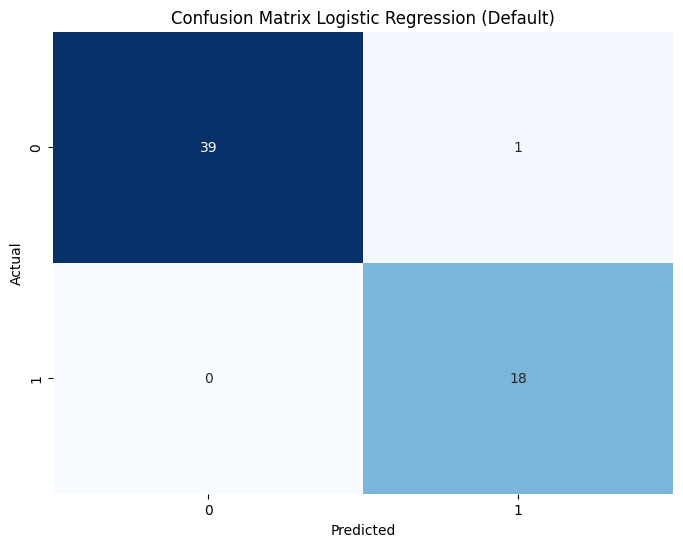

In [119]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

result_default = []

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# data train
acc_train = round(accuracy_score(y_train, y_pred_train),2)
prec_train = round(precision_score(y_train, y_pred_train),2)
rec_train = round(recall_score(y_train, y_pred_train),2)
f1_train = round(f1_score(y_train, y_pred_train),2)
roc_train = round(roc_auc_score(y_train, y_pred_train),2)

# data test
acc_test = round(accuracy_score(y_test, y_pred_test),2)
prec_test = round(precision_score(y_test, y_pred_test),2)
rec_test = round(recall_score(y_test, y_pred_test),2)
f1_test = round(f1_score(y_test, y_pred_test),2)
roc_test = round(roc_auc_score(y_test, y_pred_test),2)

# showing confusion metrics
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Logistic Regression (Default)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

result_default.append(['Logistic Regression(Default)', acc_train, acc_test, prec_train, prec_test, rec_train, rec_test, f1_train, f1_test, roc_train, roc_test])
result_default = pd.DataFrame(result_default, columns=['model', 'acc_train', 'acc_test', 'prec_train', 'prec_test', 'rec_train', 'rec_test', 'f1_train', 'f1_test', 'roc_train', 'roc_test'])
result_default

Best parameters: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'l1_ratio': 1.0, 'C': 1.0}


,model,acc_train,acc_test,prec_train,prec_test,rec_train,rec_test,f1_train,f1_test,roc_train,roc_test
0,Logistic Regression (Tuning),0.99,0.98,0.98,0.95,1.0,1.0,0.99,0.97,0.99,0.99


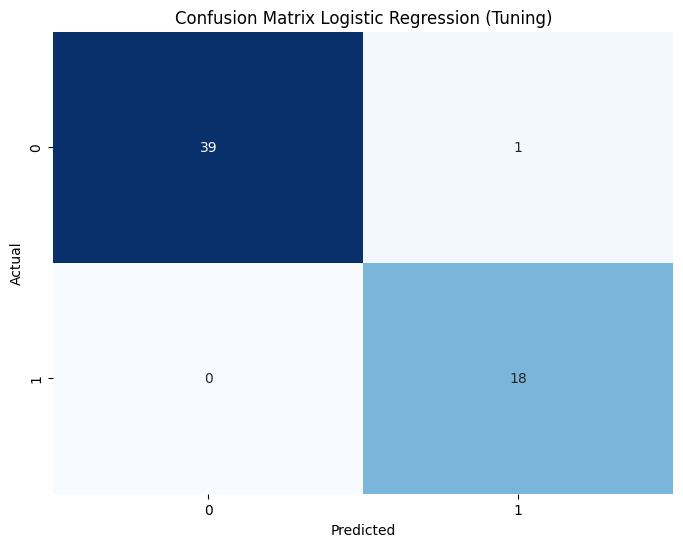

In [120]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],
    'max_iter': [100, 200, 500, 1000],
    'l1_ratio': [0.0, 0.5, 1.0]
}

# Initialize Logistic Regression
logistic = LogisticRegression(random_state=42)

# Initialize GridSearchCV
random_search = RandomizedSearchCV(
    estimator=logistic,
    param_distributions=param_grid,
    n_iter=50,               # Jumlah iterasi (kombinasi) untuk dicoba
    cv=5,                    # Cross-validation 5 fold
    scoring='roc_auc',       # Metode evaluasi ROC AUC
    n_jobs=-1,               # Paralel untuk mempercepat
    random_state=42          # Seed untuk hasil yang konsisten
)

# Fit the grid search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_

print(f"Best parameters: {best_params}")

# Train the model with the best parameters
model_tuning = random_search.best_estimator_
model_tuning.fit(X_train, y_train)

# Evaluate the model (example using roc_auc_score)
result_tuning = []

y_pred_test = model_tuning.predict(X_test)
y_pred_train = model_tuning.predict(X_train)

# data train
acc_train = round(accuracy_score(y_train, y_pred_train),2)
prec_train = round(precision_score(y_train, y_pred_train),2)
rec_train = round(recall_score(y_train, y_pred_train),2)
f1_train = round(f1_score(y_train, y_pred_train),2)
roc_train = round(roc_auc_score(y_train, y_pred_train),2)

# data test
acc_test = round(accuracy_score(y_test, y_pred_test),2)
prec_test = round(precision_score(y_test, y_pred_test),2)
rec_test = round(recall_score(y_test, y_pred_test),2)
f1_test = round(f1_score(y_test, y_pred_test),2)
roc_test = round(roc_auc_score(y_test, y_pred_test),2)

# showing confusion metrics
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Logistic Regression (Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

result_tuning.append(['Logistic Regression (Tuning)', acc_train, acc_test, prec_train, prec_test, rec_train, rec_test, f1_train, f1_test, roc_train, roc_test])
result_tuning = pd.DataFrame(result_tuning, columns=['model', 'acc_train', 'acc_test', 'prec_train', 'prec_test', 'rec_train', 'rec_test', 'f1_train', 'f1_test', 'roc_train', 'roc_test'])
result_tuning

In [121]:
full_result = pd.concat([result_default, result_tuning], axis=0)
full_result

,model,acc_train,acc_test,prec_train,prec_test,rec_train,rec_test,f1_train,f1_test,roc_train,roc_test
0,Logistic Regression(Default),0.99,0.98,0.99,0.95,1.0,1.0,0.99,0.97,0.99,0.99
0,Logistic Regression (Tuning),0.99,0.98,0.98,0.95,1.0,1.0,0.99,0.97,0.99,0.99


In [122]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_tuning, X_train, y_train, cv=5, scoring='f1')

print("Cross-validation scores for each fold:")
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: {score}")

print(f"\nMean cross-validation score: {cv_scores.mean()}")

Cross-validation scores for each fold:
Fold 1: 0.9846153846153847
Fold 2: 0.9846153846153847
Fold 3: 0.9850746268656716
Fold 4: 1.0
Fold 5: 1.0

Mean cross-validation score: 0.9908610792192881


# Feature Importance

In [123]:
X_test = pd.DataFrame(X_test, columns=X.columns)

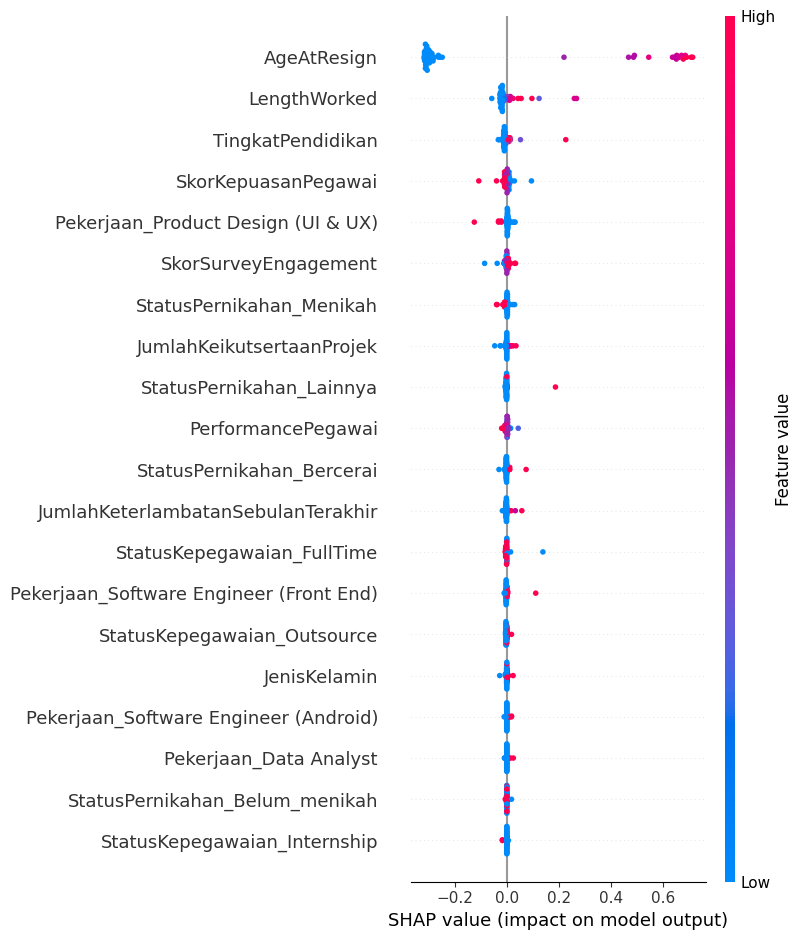

In [124]:
import shap

explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

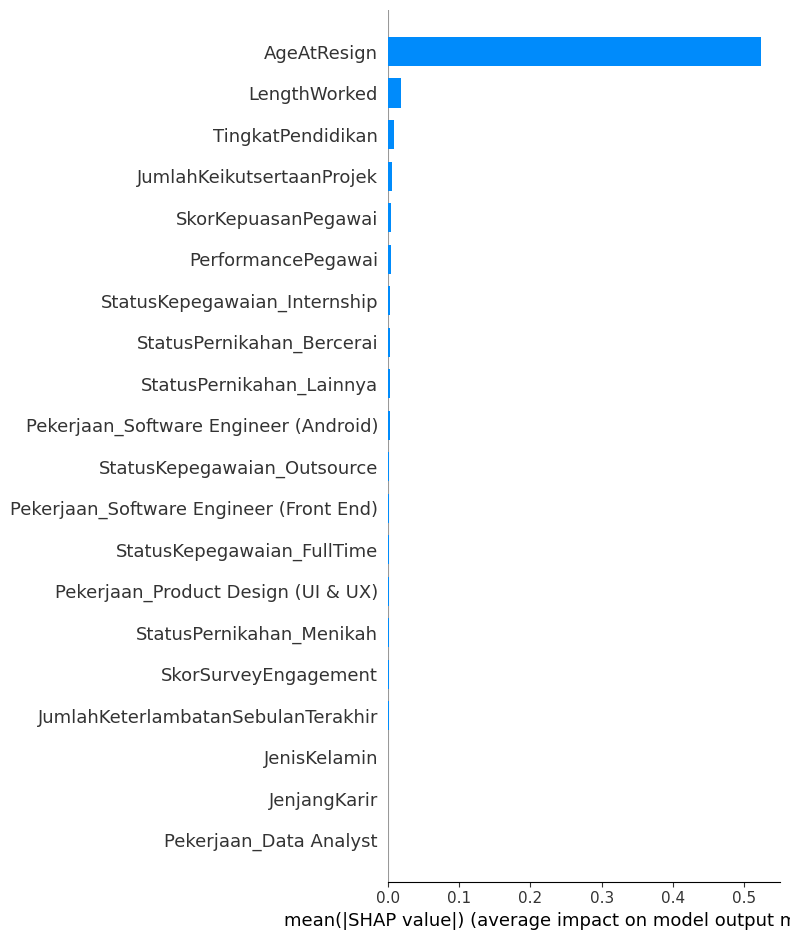

In [125]:
shap.summary_plot(shap_values[:5], X_test, plot_type="bar")

In [126]:
# The most common reason employe resign
top_reason = df_eda[df_eda['Resign'] == 'Resign'].groupby(['AlasanResign']).size().sort_values(ascending=False).head(10).reset_index(name='count')
top_reason

,AlasanResign,count
0,jam_kerja,16
1,ganti_karir,14
2,kejelasan_karir,11
3,tidak_bisa_remote,11
4,toxic_culture,10
5,leadership,9
6,tidak_bahagia,8
7,internal_conflict,4
8,apresiasi,2


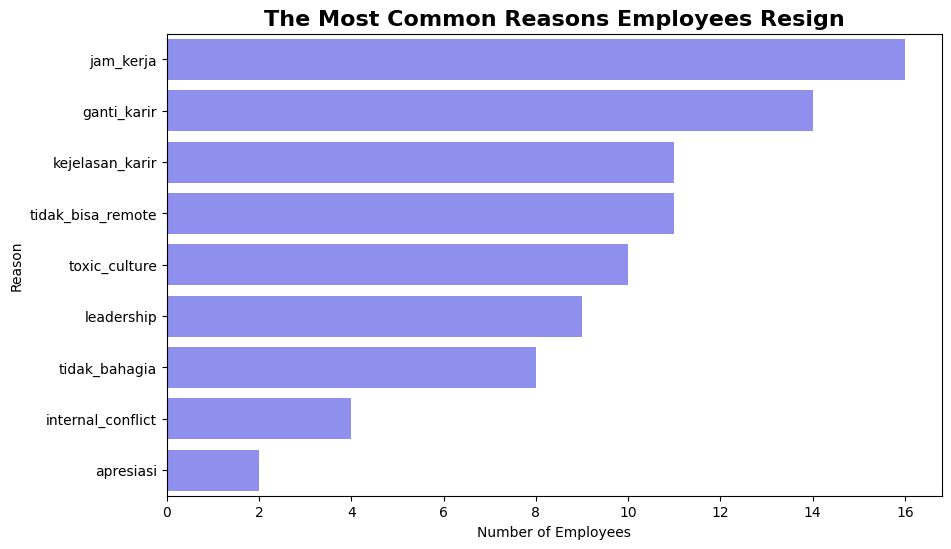

In [127]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_reason, y='AlasanResign', x='count', color='blue', alpha=0.5)
plt.title('The Most Common Reasons Employees Resign', fontsize=16, weight = 'bold')
plt.ylabel('Reason')
plt.xlabel('Number of Employees')
plt.show()

# Kesimpulan dan Rekomendasi Bisnis untuk Mengurangi Tingkat Resign Karyawan

1.   Usia Saat Resign

      Karyawan yang sudah tua cenderung lebih sering resign.

2. Lama Bekerja

      Semakin lama karyawan bekerja, semakin kecil kemungkinan mereka untuk resign.

3. Tingkat Pendidikan

      Karyawan dengan tingkat pendidikan lebih tinggi cenderung resign lebih sering.

4. Skor Kepuasan Karyawan

      Karyawan dengan kepuasan kerja yang rendah lebih berisiko untuk resign.

## Rekomendasi Bisnis

1. Usia Saat Resign

      Untuk mempertahankan karyawan yang lebih tua:

      * Fleksibilitas Kerja: Tawarkan opsi kerja fleksibel seperti kerja paruh waktu atau remote.
      * Program Pensiun: Kembangkan program pensiun yang menarik untuk memberikan keamanan finansial.
      * Jalur Pengembangan Karir: Sediakan jalur pengembangan karir yang sesuai dengan tahap kehidupan mereka, seperti peran mentoring atau konsultan.

2. Lama Bekerja

      Untuk menjaga karyawan yang sudah lama bekerja:

      * Penghargaan: Berikan penghargaan atas loyalitas mereka, seperti bonus masa kerja atau pengakuan formal.
      * Peluang Pengembangan Karir: Tawarkan pelatihan lanjutan dan promosi internal untuk menjaga motivasi mereka.

3. Tingkat Pendidikan

      Untuk karyawan dengan pendidikan tinggi:

      * Pengembangan Lebih Lanjut: Sediakan peluang untuk pelatihan lanjutan atau pendidikan tambahan.
      * Proyek yang Menantang: Berikan tanggung jawab dalam proyek-proyek yang menantang untuk memanfaatkan keahlian mereka.
      * Jalur Karir yang Jelas: Sediakan jalur karir yang transparan dan peluang peningkatan yang jelas.

4. Kepuasan Karyawan

      Untuk meningkatkan kepuasan kerja:

      * Lingkungan Kerja: Ciptakan lingkungan kerja yang nyaman dan mendukung.
      * Kompensasi: Tinjau dan tingkatkan paket kompensasi sesuai dengan pasar.
      * Pengakuan: Berikan pengakuan atas pencapaian karyawan secara rutin.
      * Keseimbangan Kerja-Hidup: Promosikan keseimbangan kerja-hidup melalui kebijakan kerja fleksibel dan dukungan untuk kesehatan mental.
      * Survei dan Umpan Balik: Lakukan survei kepuasan kerja dan berikan ruang untuk umpan balik karyawan secara rutin.

Dengan menerapkan rekomendasi ini, perusahaan dapat mengurangi tingkat resign karyawan dan meningkatkan retensi serta kepuasan kerja secara keseluruhan.